4231


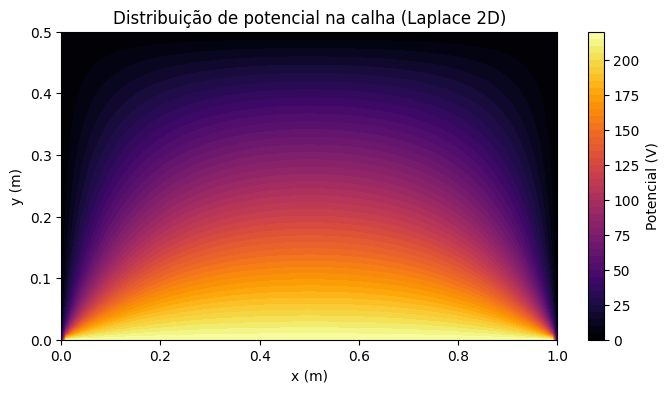

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

V0 = float(input('Informe o potencial na base da calha: '))

#Definindo as dimensões da calha e os passos dados

Lx = 1
Ly = 0.5

h = 0.01 #Passo tanto em x quanto em y. O ideal é escolher um passo cuja divisão Lx / h e Ly / h resulte em inteiros, se possível

#Número de pontos que serão usados na discretização:

Nx = int(1 + Lx / h)
Ny = int(1 + Ly / h)

#Determinando as condições iniciais e de contorno:

V = np.zeros((Ny, Nx)) #As linhas no plano cartesiano são as coordenadas y, e as colunas as coordenadas x

V[0, :] = V0 #Definindo o potencial na base (i = 0)
V[:,0] = 0 #Definindo o potencial nas paredes (j = 0 e o ultimo j)
V[:,-1] = 0

'''
Para um problema assim, aplicamos o metodo de Gauss-Seidel, que consiste em calcular iterativamente o potencial em cada ponto diversas vezes. Cada vez calculada, o valor é atualizado para um mais preciso
'''

diff_parada = 1e-5
diff = 100
iteracoes = 0

while(diff > diff_parada): #Enquanto a diferença de uma iteração para a outra for acima de um certo valor, continue o cálculo
    Vold = V.copy() #Salvando o valor atual de V, para o calculo da diferenca relativa
    for i in range(1,Ny-1,1): #Variando em y
        for j in range(1,Nx-1,1): #Variando em x
            V[i,j] = (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1]) / 4
    diff = np.max(np.abs(V - Vold))
    iteracoes = iteracoes + 1
print(iteracoes)

#Fazendo o gráfico

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8,4))
cont = plt.contourf(X, Y, V, levels=50, cmap='inferno')
plt.colorbar(cont, label="Potencial (V)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Distribuição de potencial na calha (Laplace 2D)")
plt.gca().set_aspect('equal')
plt.imshow(V, cmap="inferno", origin="lower", extent=[0,1,0,0.5], aspect="auto")
plt.show()